## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import tensorflow as tf
import tensorflow.contrib.eager as tfe

# Run only once!
tf.enable_eager_execution()

In [2]:
print("TensorFlow version: {}".format(tf.VERSION))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 1.9.0
Eager execution: True


## The XOR Problem

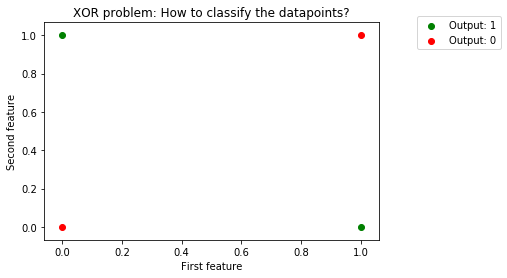

In [3]:
# Illustration of the problem
XOR_True = [(1, 0), (0, 1)]
XOR_False = [(0, 0), (1, 1)]
feat1, feat2 = zip(*XOR_True)
plt.scatter(feat1, feat2, c="g", label='Output: 1')
feat1, feat2 = zip(*XOR_False)
plt.scatter(feat1, feat2, c="r", label='Output: 0')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('XOR problem: How to classify the datapoints?')
plt.show()

## Data

In [4]:
# Create dataset with features and labels for use with TensorFlow
features, labels = (tf.constant([[0,0],[0,1],[1,0],[1,1]], "float32"), tf.constant([[0],[1],[1],[0]], "float32"))
#train_dataset = tf.data.Dataset.from_tensor_slices((features,labels))

## Parameters

In [5]:
# Parameters
num_epochs = 1000
n_hidden_1 = 32        # 32 nodes in hidden layer
num_classes = 1        # 1 output node
learning_rate = 0.001   

## Build neural network model with hidden layer, using Keras' "models" module

In [6]:
# Setup Model (with activation functions relu and sigmoid)
class Model(tf.keras.Model):   
    
    def __init__(self, n_hidden_1, num_classes):
        super(Model, self).__init__()
        self.layer1 = tf.keras.layers.Dense(n_hidden_1, activation='relu')
        self.out_layer = tf.keras.layers.Dense(num_classes, activation='sigmoid')
    
    def call(self, inputs, training=None, mask=None):
        x = self.layer1(inputs)
        return self.out_layer(x)
    
model = Model(n_hidden_1, num_classes)

## Loss function and optimizer

In [7]:
# Define the loss and gradient function
def loss_function(model, x, y):
    y_ = model(x)
    return tf.losses.mean_squared_error(labels=y, predictions=y_)   # use MSE for loss function

loss = loss_function(model, features, labels)

In [8]:
# The optimizer applies the computed gradients to the model's variables to minimize the loss function. 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

## Training 

In [9]:
# Steps:
# Iterate num_epochs
# Make prediction and compare with label
# Measure inaccuracy of the prediction and calculate loss
# Update model with optimizer

for epoch in range(num_epochs):
    grads = tfe.implicit_gradients(loss_function)(model, features, labels)
    optimizer.apply_gradients(grads)
    
    if (epoch==0) | ((epoch+1)%100==0):
        print("Epoch {:03d}: Loss: {:.3f}".format(epoch+1, loss_function(model, features, labels).numpy()))

Epoch 001: Loss: 0.239
Epoch 100: Loss: 0.188
Epoch 200: Loss: 0.137
Epoch 300: Loss: 0.095
Epoch 400: Loss: 0.066
Epoch 500: Loss: 0.049
Epoch 600: Loss: 0.037
Epoch 700: Loss: 0.030
Epoch 800: Loss: 0.025
Epoch 900: Loss: 0.021
Epoch 1000: Loss: 0.018
